## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [1]:
import pandas as pd
from pathlib import Path
%matplotlib inline

## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [2]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
bitstamp = pd.read_csv(
    Path("Resources/bitstamp.csv"),
    index_col="Timestamp",
    parse_dates=True,
    infer_datetime_format=True
)


### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [3]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
bitstamp.head(), bitstamp.tail()

(                         Open      High       Low      Close  BTC Volume  \
 Timestamp                                                                  
 2018-01-01 00:00:00  13681.04  13681.04  13637.93  $13646.48    3.334553   
 2018-01-01 00:01:00  13646.48  13658.75  13610.18  $13658.75    2.663188   
 2018-01-01 00:02:00  13616.93  13616.93  13610.06  $13610.22    0.084653   
 2018-01-01 00:03:00  13610.27  13639.09  13610.27  $13639.09    7.182986   
 2018-01-01 00:04:00  13635.35  13636.35  13620.00   $13620.0    1.069665   
 
                        USD Volume  Weighted Price  
 Timestamp                                          
 2018-01-01 00:00:00  45482.128785    13639.647479  
 2018-01-01 00:01:00  36361.390888    13653.332816  
 2018-01-01 00:02:00   1152.144036    13610.136247  
 2018-01-01 00:03:00  97856.416478    13623.361128  
 2018-01-01 00:04:00  14582.660932    13632.923329  ,
                         Open     High      Low     Close  BTC Volume  \
 Timestamp    

### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [4]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
coinbase = pd.read_csv(
    Path("Resources/coinbase.csv"),
    index_col="Timestamp",
    parse_dates=True,
    infer_datetime_format=True
)

In [5]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
coinbase.head(),coinbase.tail()

(                         Open      High       Low      Close  BTC Volume  \
 Timestamp                                                                  
 2018-01-01 00:00:00  13620.00  13620.00  13608.49  $13608.49   20.812754   
 2018-01-01 00:01:00  13607.14  13607.14  13601.66  $13601.66   13.474359   
 2018-01-01 00:02:00  13601.44  13601.44  13580.00   $13580.0   11.536360   
 2018-01-01 00:03:00  13587.31  13587.31  13542.70  $13550.34   16.328039   
 2018-01-01 00:04:00  13550.34  13585.95  13550.34  $13583.44    9.955364   
 
                        USD Volume  Weighted Price  
 Timestamp                                          
 2018-01-01 00:00:00  283451.08537    13619.105106  
 2018-01-01 00:01:00  183283.97801    13602.426919  
 2018-01-01 00:02:00  156789.19686    13590.872506  
 2018-01-01 00:03:00  221413.64182    13560.332806  
 2018-01-01 00:04:00  135141.26944    13574.719401  ,
                         Open     High      Low     Close  BTC Volume  \
 Timestamp    

## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [6]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame
bitstamp.isnull().sum()

Open              473
High              473
Low               473
Close               0
BTC Volume        473
USD Volume        473
Weighted Price    473
dtype: int64

In [7]:
bitstamp = bitstamp.dropna().copy()

### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [8]:
# Use the str.replace function to remove the dollar sign, $
bitstamp["Close"] = bitstamp["Close"].str.replace("$", "")

c:\ProgramData\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


### Step 3: Convert the data type of the Close column to a `float`.

In [9]:
# Convert the Close data type to a float
bitstamp.dtypes

Open              float64
High              float64
Low               float64
Close              object
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

In [10]:
bitstamp["Close"] = bitstamp["Close"].astype("float")

### Step 4: Review the data for duplicated values, and drop them if necessary.

In [11]:
# Review the data for duplicate values, and drop them if necessary
bitstamp.duplicated().sum()

0

In [12]:
 # final data review for bitstamp
bitstamp.isnull().sum(), bitstamp.dtypes, bitstamp.duplicated().sum()

(Open              0
 High              0
 Low               0
 Close             0
 BTC Volume        0
 USD Volume        0
 Weighted Price    0
 dtype: int64,
 Open              float64
 High              float64
 Low               float64
 Close             float64
 BTC Volume        float64
 USD Volume        float64
 Weighted Price    float64
 dtype: object,
 0)

### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [13]:
# Repeat Steps 1–4 for the coinbase DataFrame

# Step 1 - replace or drop NaN's

coinbase.isnull().sum()

Open              218
High              218
Low               218
Close               0
BTC Volume        218
USD Volume        218
Weighted Price    218
dtype: int64

In [14]:
coinbase = coinbase.dropna().copy()

In [15]:
# Step 2 - remove the "$"s

coinbase["Close"] = coinbase["Close"].str.replace("$", "")

c:\ProgramData\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
# Step 3 - convert 'Close' column data to 'float' 

coinbase["Close"] = coinbase["Close"].astype("float")

In [17]:
# Step 4 - remove any duplicates

coinbase.duplicated().sum()

0

In [18]:
# final data review for coinbase 
coinbase.isnull().sum(), coinbase.dtypes, coinbase.duplicated().sum()

(Open              0
 High              0
 Low               0
 Close             0
 BTC Volume        0
 USD Volume        0
 Weighted Price    0
 dtype: int64,
 Open              float64
 High              float64
 Low               float64
 Close             float64
 BTC Volume        float64
 USD Volume        float64
 Weighted Price    float64
 dtype: object,
 0)

## Analyze the Data

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [19]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bitstamp_sliced = bitstamp['Close'].loc['2018-01-01' : '2018-03-31']

# Review the first five rows of the DataFrame
bitstamp_sliced.head

<bound method NDFrame.head of Timestamp
2018-01-01 00:00:00    13646.48
2018-01-01 00:01:00    13658.75
2018-01-01 00:02:00    13610.22
2018-01-01 00:03:00    13639.09
2018-01-01 00:04:00    13620.00
                         ...   
2018-03-31 23:55:00     6922.56
2018-03-31 23:56:00     6920.32
2018-03-31 23:57:00     6934.72
2018-03-31 23:58:00     6927.65
2018-03-31 23:59:00     6928.01
Name: Close, Length: 129067, dtype: float64>

In [20]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
coinbase_sliced = coinbase['Close'].loc['2018-01-01' : '2018-03-31']

# Review the first five rows of the DataFrame
coinbase.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,13580.00,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,13583.44,9.955364,135141.26944,13574.719401


### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [21]:
# Generate the summary statistics for the bitstamp DataFrame
bitstamp_sliced.describe()

count    129067.000000
mean      10459.842453
std        2315.976088
min        5944.000000
25%        8613.370000
50%       10145.950000
75%       11444.810000
max       17234.980000
Name: Close, dtype: float64

In [22]:
# Generate the summary statistics for the coinbase DataFrame
coinbase_sliced.describe()

count    129322.000000
mean      10449.140958
std        2317.197419
min        5882.310000
25%        8609.230000
50%       10137.440000
75%       11397.237500
max       17177.990000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'BTC on BTSP'}, xlabel='Timestamp', ylabel='Price (USD$)'>

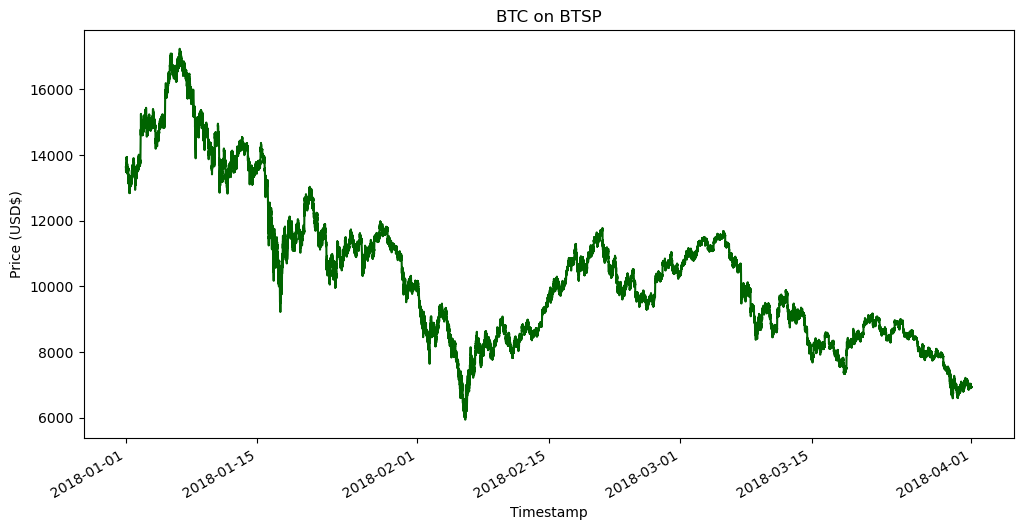

In [23]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
bitstamp_sliced.plot(figsize=(12,6), ylabel="Price (USD$)", title="BTC on BTSP", color="#006400") # looked up hex code for 'dark green' - https://www.colorhexa.com/

<AxesSubplot:title={'center':'BTC on COIN'}, xlabel='Timestamp', ylabel='Price (USD$)'>

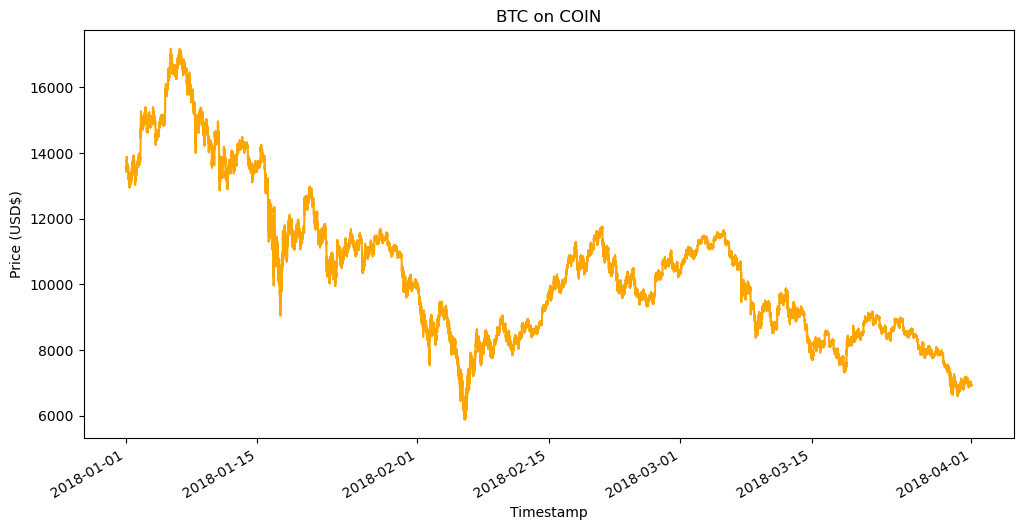

In [24]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization

coinbase_sliced.plot(figsize=(12,6), ylabel="Price (USD$)", title="BTC on COIN", color="orange") # set color to 'orange' for visibility alone and good contrast to 'dark green'

<AxesSubplot:title={'center':'BTC Arbitrage Opportunities: BTSP and COIN'}, xlabel='Timestamp', ylabel='Price (USD$)'>

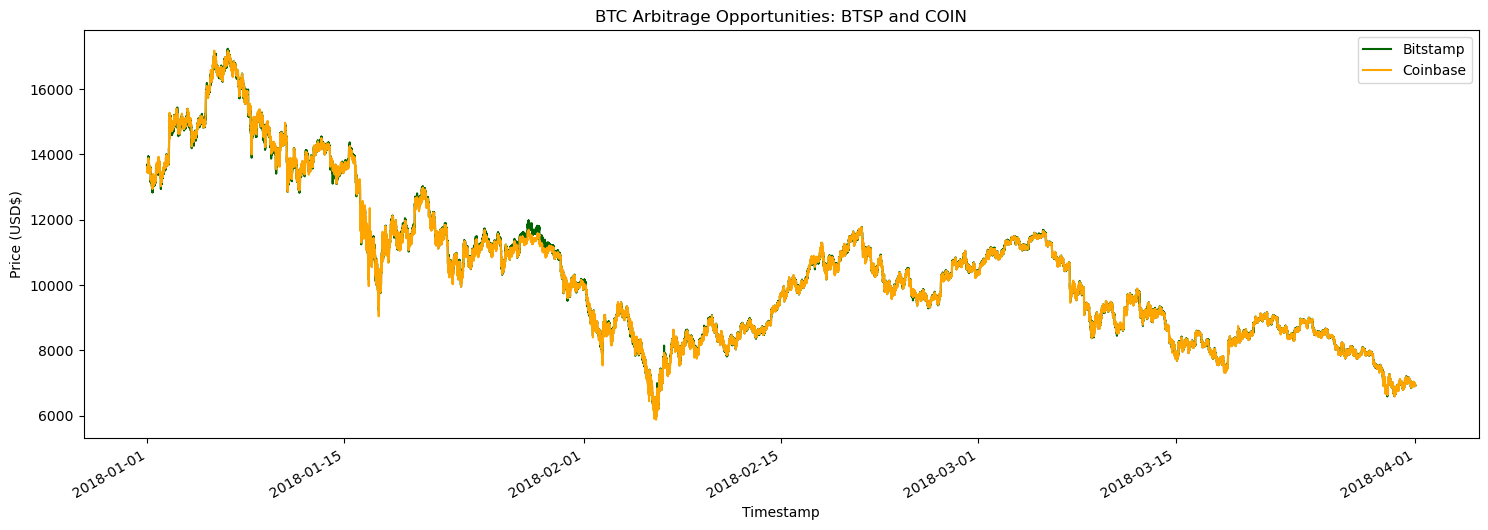

In [25]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp_sliced.plot(
    legend=True,
    figsize=(18,6),
    ylabel="Price (USD$)",
    title="BTC Arbitrage Opportunities: BTSP and COIN",
    color="#006400",
    label="Bitstamp"
)
coinbase_sliced.plot(
    legend=True,
    figsize=(18,6),
    ylabel="Price (USD$)",
    color="orange",
    label="Coinbase"
)

<AxesSubplot:title={'center':'BTC Arbitrage Opportunities (Jan. 2018): BTSP and COIN'}, xlabel='Timestamp', ylabel='Price (USD$)'>

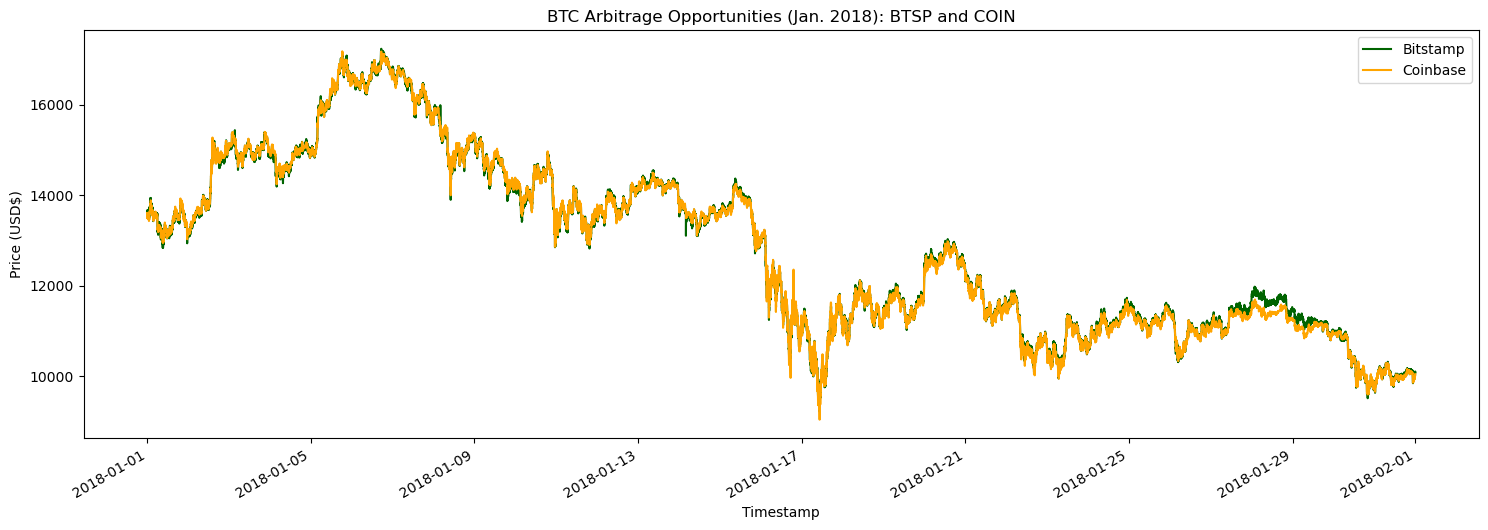

In [26]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp['Close'].loc['2018-01-01' : '2018-01-31'].plot(
    legend=True,
    figsize=(18,6),
    ylabel="Price (USD$)",
    title="BTC Arbitrage Opportunities (Jan. 2018): BTSP and COIN",
    color="#006400",
    label="Bitstamp")
coinbase['Close'].loc['2018-01-01' : '2018-01-31'].plot(
    legend=True,
    figsize=(18,6),
    ylabel="Price (USD$)",
    color="orange",
    label="Coinbase")

<AxesSubplot:title={'center':'BTC Arbitrage Opportunities (Mar. 2018): BTSP and COIN'}, xlabel='Timestamp', ylabel='Price (USD$)'>

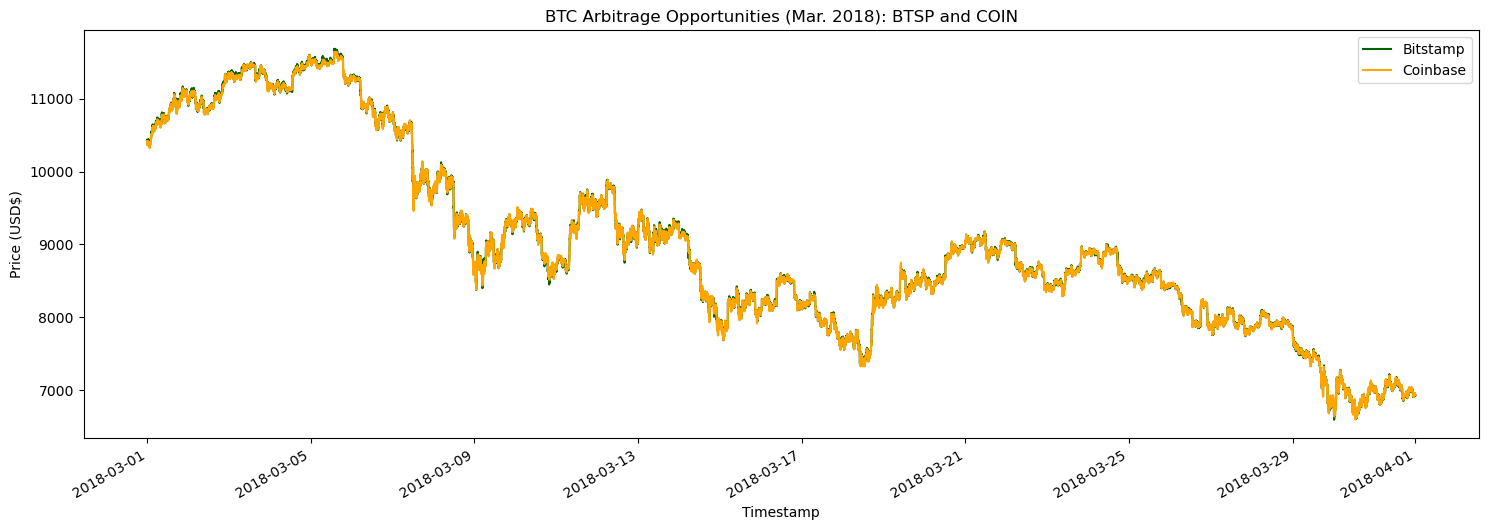

In [27]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 
bitstamp['Close'].loc['2018-03-01' : '2018-03-31'].plot(
    legend=True,
    figsize=(18,6),
    ylabel="Price (USD$)",
    title="BTC Arbitrage Opportunities (Mar. 2018): BTSP and COIN",
    color="#006400",
    label="Bitstamp")
coinbase['Close'].loc['2018-03-01' : '2018-03-31'].plot(
    legend=True,
    figsize=(18,6),
    ylabel="Price (USD$)",
    color="orange",
    label="Coinbase")

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** Yes.  At the beginning of Q1 2018, BTC traded in close range with little spread.  By the end of Jan. 2018, BTC price showed significant spread that generated an arbitrage opportunity.  Then in Feb. 2018, the spread appears a

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the later part of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

<AxesSubplot:title={'center':'Early BTC price spread January 2, 2018: BTSP and COIN'}, xlabel='Timestamp', ylabel='Price (USD$)'>

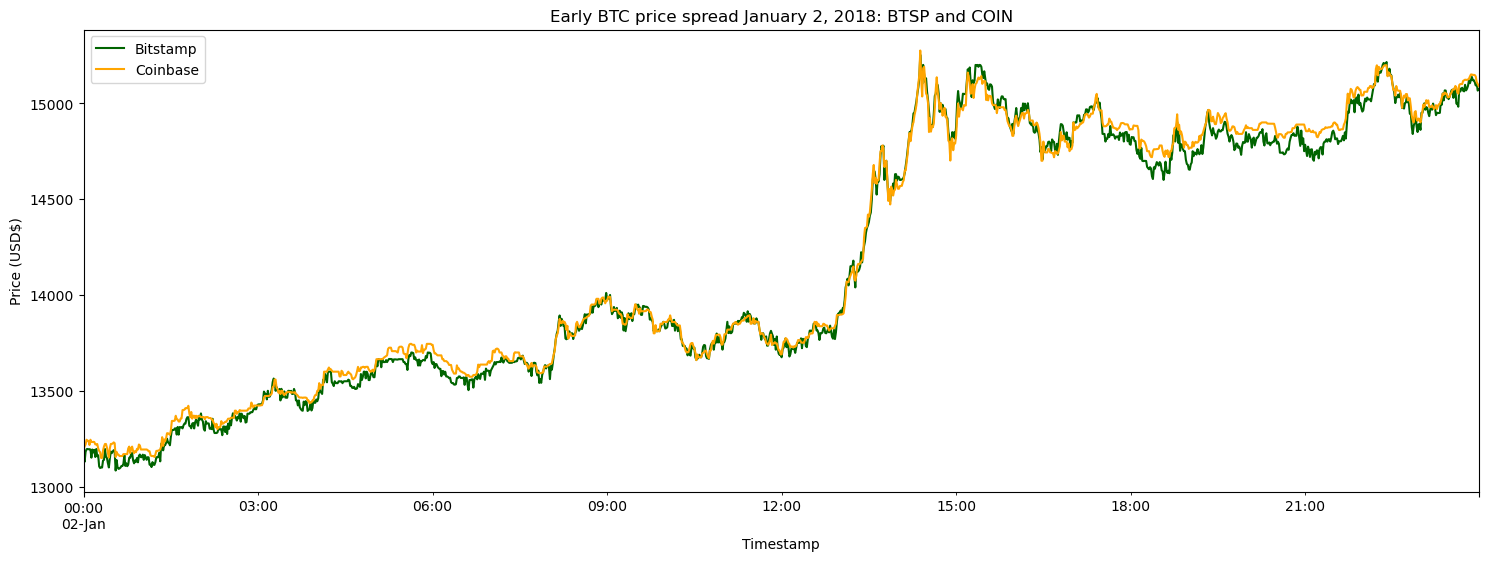

In [28]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp['Close'].loc['2018-01-02'].plot(
    legend=True,
    figsize=(18,6),
    ylabel="Price (USD$)",
    title="Early BTC price spread January 2, 2018: BTSP and COIN",
    color="#006400",
    label="Bitstamp")
                      
coinbase['Close'].loc['2018-01-02'].plot(
    legend=True,
    figsize=(18,6),
    ylabel="Price (USD$)",
    color="orange",
    label="Coinbase")

In [29]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arb_sprd_0102 = coinbase['Close'].loc['2018-01-03'] - bitstamp['Close'].loc['2018-01-03']

# Generate summary statistics for the early DataFrame
arb_sprd_0102.describe()

count    1440.000000
mean       20.860542
std        34.377651
min      -247.650000
25%        -2.015000
50%        19.280000
75%        43.445000
max       139.180000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Early BTC Arbitrage Spread: Jan. 2, 2018'}>

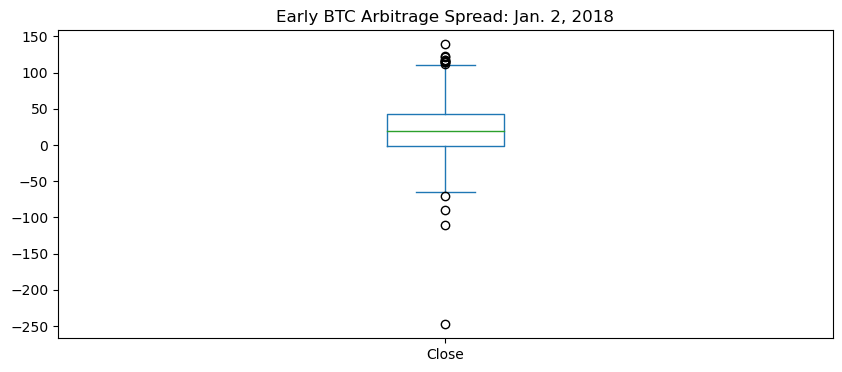

In [30]:
# Visualize the arbitrage spread from early in the dataset in a box plot
arb_sprd_0102.plot(
    kind="box",
    legend=True,
    figsize=(10,4),
    title="Early BTC Arbitrage Spread: Jan. 2, 2018"
)

<AxesSubplot:title={'center':'Middle BTC price spread - January 28, 2018: BTSP and COIN'}, xlabel='Timestamp', ylabel='Price (USD$)'>

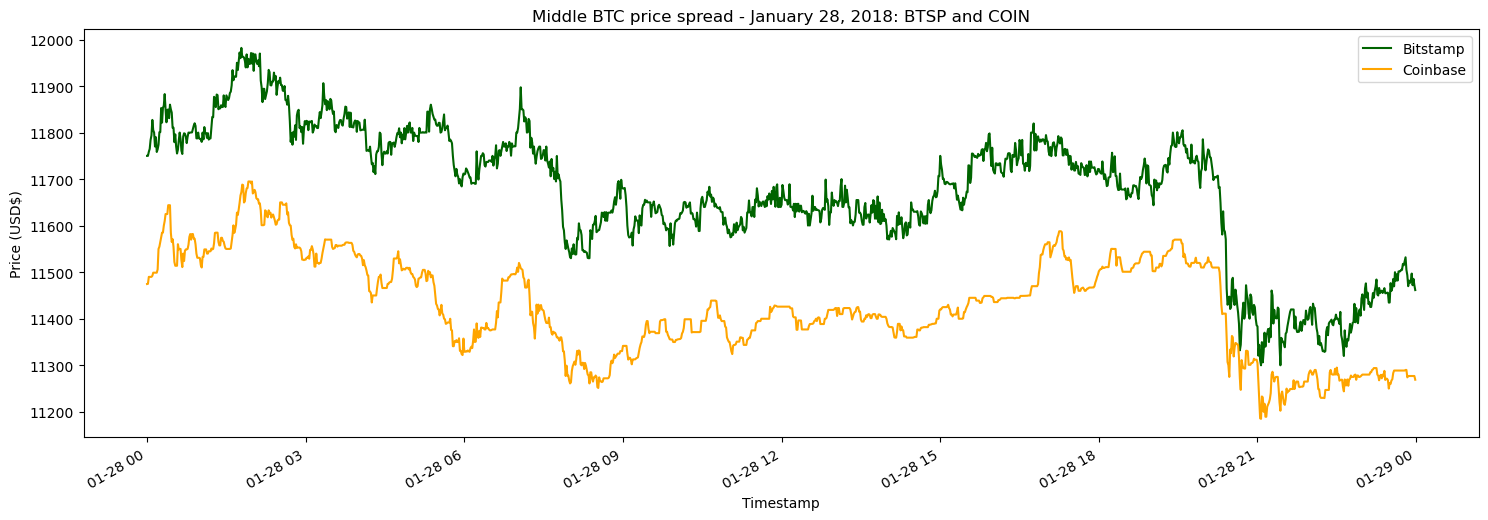

In [31]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp['Close'].loc['2018-01-28'].plot(
    legend=True,
    figsize=(18,6),
    ylabel="Price (USD$)",
    title="Middle BTC price spread - January 28, 2018: BTSP and COIN",
    color="#006400",
    label="Bitstamp")
                      
coinbase['Close'].loc['2018-01-28'].plot(
    legend=True,
    figsize=(18,6),
    ylabel="Price (USD$)",
    color="orange",
    label="Coinbase")

In [32]:
# Using the date in the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arb_sprd_mid = coinbase['Close'].loc['2018-01-28'] - bitstamp['Close'].loc['2018-01-28']

# Generate summary statistics 
arb_sprd_mid.describe()

count    1436.000000
mean     -247.552326
std        68.343472
min      -439.010000
25%      -290.925000
50%      -251.180000
75%      -210.022500
max       -55.030000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Mid Q1 2018 - BTC Arbitrage Spread: Jan. 28, 2018'}>

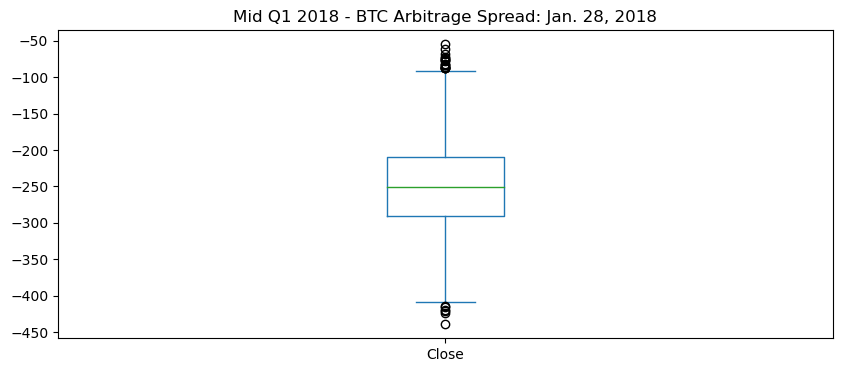

In [33]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
arb_sprd_mid.plot(
    kind="box",
    legend=True,
    figsize=(10,4),
    title="Mid Q1 2018 - BTC Arbitrage Spread: Jan. 28, 2018"
)

In [34]:
arb_sprd_mid = bitstamp['Close'].loc['2018-01-28'] - coinbase['Close'].loc['2018-01-28']

# Generate summary statistics 
arb_sprd_mid.describe()

count    1436.000000
mean      247.552326
std        68.343472
min        55.030000
25%       210.022500
50%       251.180000
75%       290.925000
max       439.010000
Name: Close, dtype: float64

In [35]:
# Using the date from the late that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arb_sprd_late = coinbase['Close'].loc['2018-03-25'] - bitstamp['Close'].loc['2018-03-25']

# Generate summary statistics for the late DataFrame
arb_sprd_late.describe()

count    1404.000000
mean       -2.294423
std         9.853020
min       -34.640000
25%        -8.810000
50%        -2.805000
75%         3.767500
max        53.940000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Early BTC Arbitrage Spread: Mar. 25, 2018'}>

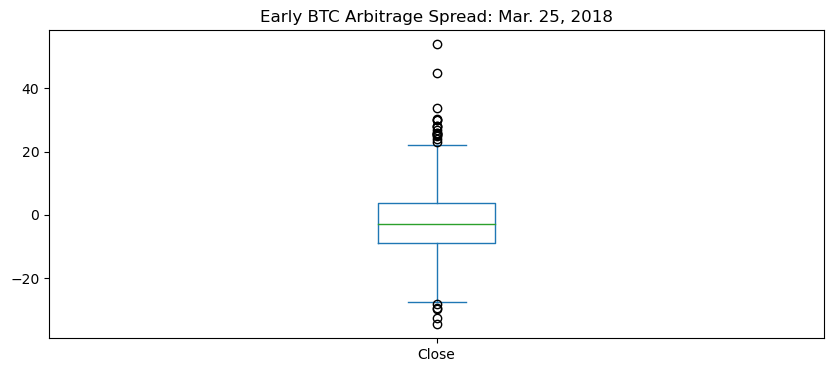

In [36]:
# Visualize the arbitrage spread from late in the dataset in a box plot
arb_sprd_late.plot(
    kind="box",
    legend=True,
    figsize=(10,4),
    title="Early BTC Arbitrage Spread: Mar. 25, 2018"
)

### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arb_sprd DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arb_sprd DataFrame, where the spread is greater than zero.

*NOTE*: For illustration, only one of the three dates is shown in the starter code below.

In [37]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one

price_spread_0102 = coinbase['Close'].loc['2018-01-02'] - bitstamp['Close'].loc['2018-01-02']  # 1/2/2018  <--- COIN > BTSP
price_spread_0128 = bitstamp['Close'].loc['2018-01-28'] - coinbase['Close'].loc['2018-01-28']  # 1/28/2018  <--- BTSP > COIN
price_spread_0325 = coinbase['Close'].loc['2018-03-25'] - bitstamp['Close'].loc['2018-03-25']  # 3/25/2018  <--- COIN > BTSP

# Use a conditional statement to generate the summary statistics for each arb_sprd DataFrame
display(arb_sprd_0102[arb_sprd_0102 > 0].describe())
display(arb_sprd_mid[arb_sprd_mid > 0].describe())
display(arb_sprd_late[arb_sprd_late > 0].describe())


count    1039.000000
mean       36.201319
std        25.452592
min         0.010000
25%        15.660000
50%        32.260000
75%        52.050000
max       139.180000
Name: Close, dtype: float64

count    1436.000000
mean      247.552326
std        68.343472
min        55.030000
25%       210.022500
50%       251.180000
75%       290.925000
max       439.010000
Name: Close, dtype: float64

count    540.000000
mean       7.356963
std        6.785546
min        0.010000
25%        2.530000
50%        5.430000
75%        9.945000
max       53.940000
Name: Close, dtype: float64

#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [38]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_0102 = arb_sprd_0102[arb_sprd_0102>0] / bitstamp['Close'].loc['2018-01-02']
spread_return_mid = arb_sprd_mid[arb_sprd_mid>0] / coinbase['Close'].loc['2018-01-28']
spread_return_late = arb_sprd_late[arb_sprd_late>0] / bitstamp['Close'].loc['2018-03-25']

# Review the spread return DataFrame
# display(spread_return_0102.head(10),spread_return_0102.tail(10))
# display(spread_return_mid.head(10), spread_return_mid.tail(10))
display(spread_return_late.head(10), spread_return_late.tail(10))

Timestamp
2018-03-25 00:00:00         NaN
2018-03-25 00:01:00    0.000704
2018-03-25 00:02:00    0.001134
2018-03-25 00:03:00         NaN
2018-03-25 00:04:00         NaN
2018-03-25 00:05:00         NaN
2018-03-25 00:06:00         NaN
2018-03-25 00:07:00         NaN
2018-03-25 00:08:00         NaN
2018-03-25 00:09:00         NaN
Name: Close, dtype: float64

Timestamp
2018-03-25 23:50:00    0.003362
2018-03-25 23:51:00    0.003349
2018-03-25 23:52:00    0.001759
2018-03-25 23:53:00    0.001547
2018-03-25 23:54:00    0.001450
2018-03-25 23:55:00         NaN
2018-03-25 23:56:00         NaN
2018-03-25 23:57:00    0.001002
2018-03-25 23:58:00    0.001423
2018-03-25 23:59:00    0.000450
Name: Close, dtype: float64

#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [39]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trading_0102 = spread_return_0102[spread_return_0102 > .01]
profitable_trading_mid = spread_return_mid[spread_return_mid > .01]
profitable_trading_late = spread_return_late[spread_return_late > .01]

# Review the first five profitable trades
display(profitable_trading_0102.sum()) # .head(20))
display(profitable_trading_mid.sum()) # .head(20))
display(profitable_trading_late.sum()) # .head(20))

0.0

30.592526118932792

0.0

#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [40]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trading_0102.describe(), profitable_trading_mid.describe(), profitable_trading_late.describe()

(count    0.0
 mean     NaN
 std      NaN
 min      NaN
 25%      NaN
 50%      NaN
 75%      NaN
 max      NaN
 Name: Close, dtype: float64,
 count    1378.000000
 mean        0.022201
 std         0.005421
 min         0.010087
 25%         0.019016
 50%         0.022191
 75%         0.025413
 max         0.038510
 Name: Close, dtype: float64,
 count    0.0
 mean     NaN
 std      NaN
 min      NaN
 25%      NaN
 50%      NaN
 75%      NaN
 max      NaN
 Name: Close, dtype: float64)

#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [41]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased

profit_per_trade_0102 = profitable_trading_0102 * bitstamp['Close'].loc['2018-01-02']
profit_per_trade_mid = profitable_trading_0102 * coinbase['Close'].loc['2018-01-28']
profit_per_trade_late = profitable_trading_0102 * bitstamp['Close'].loc['2018-03-28']
                                                  
# Drop any missing values from the profit DataFrame
profit_per_trade_0102 = profit_per_trade_0102.dropna().copy()
                                                  
# View the early profit DataFrame
profit_per_trade_0102.head(10)

Series([], Name: Close, dtype: float64)

In [42]:
profit_per_trade_mid = profit_per_trade_mid.dropna().copy()
profit_per_trade_mid.head(10)

Series([], Name: Close, dtype: float64)

In [43]:
profit_per_trade_late = profit_per_trade_late.dropna().copy()
profit_per_trade_late.head(10)

Series([], Name: Close, dtype: float64)

#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [44]:
# profitable_trading_0102 = spread_return_0102[spread_return_0102 > .01]

<AxesSubplot:title={'center':'Middle Arbitrage'}, xlabel='Timestamp'>

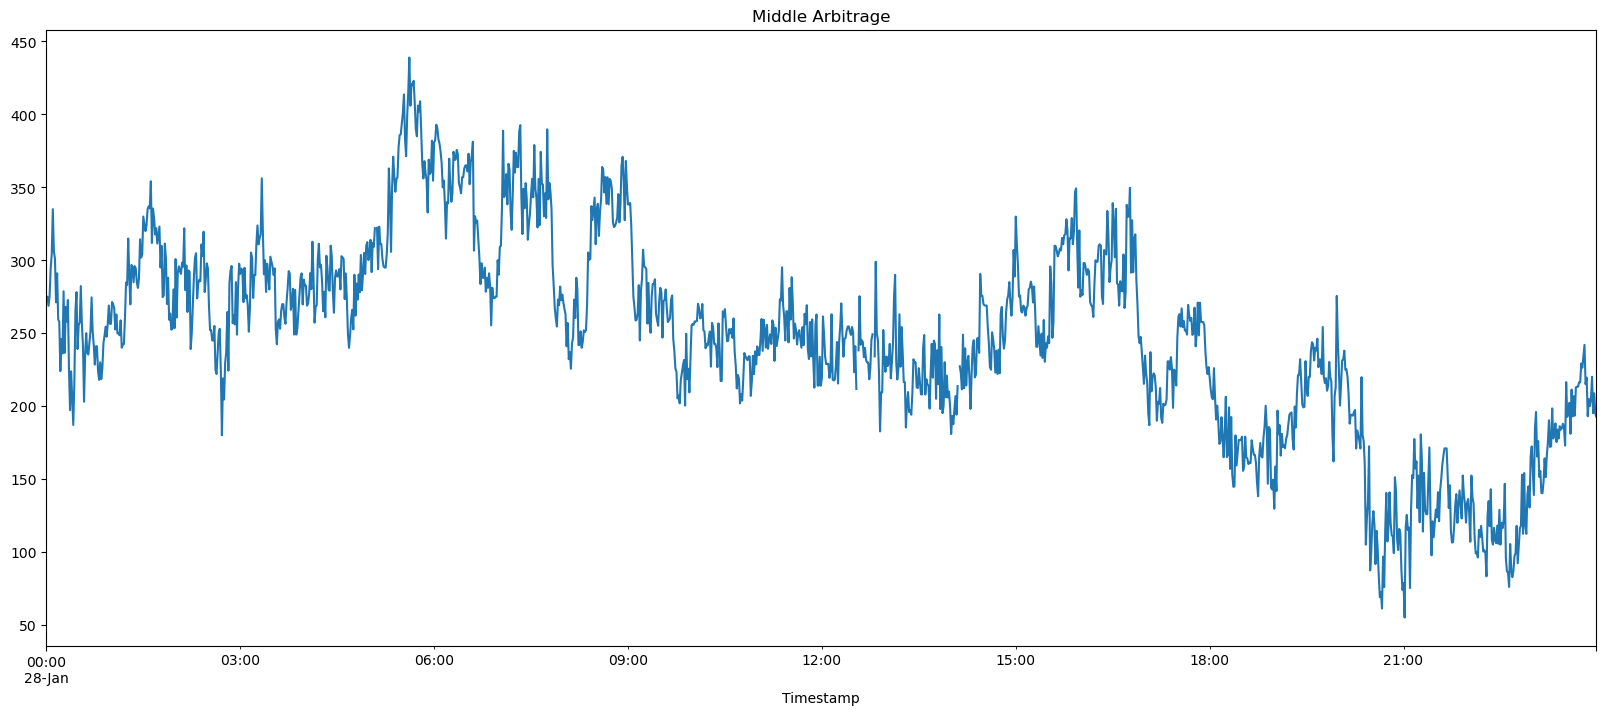

In [45]:
arb_sprd_mid.plot(figsize=(20,8), title="Middle Arbitrage")

<AxesSubplot:title={'center':'Late Arbitrage'}, xlabel='Timestamp'>

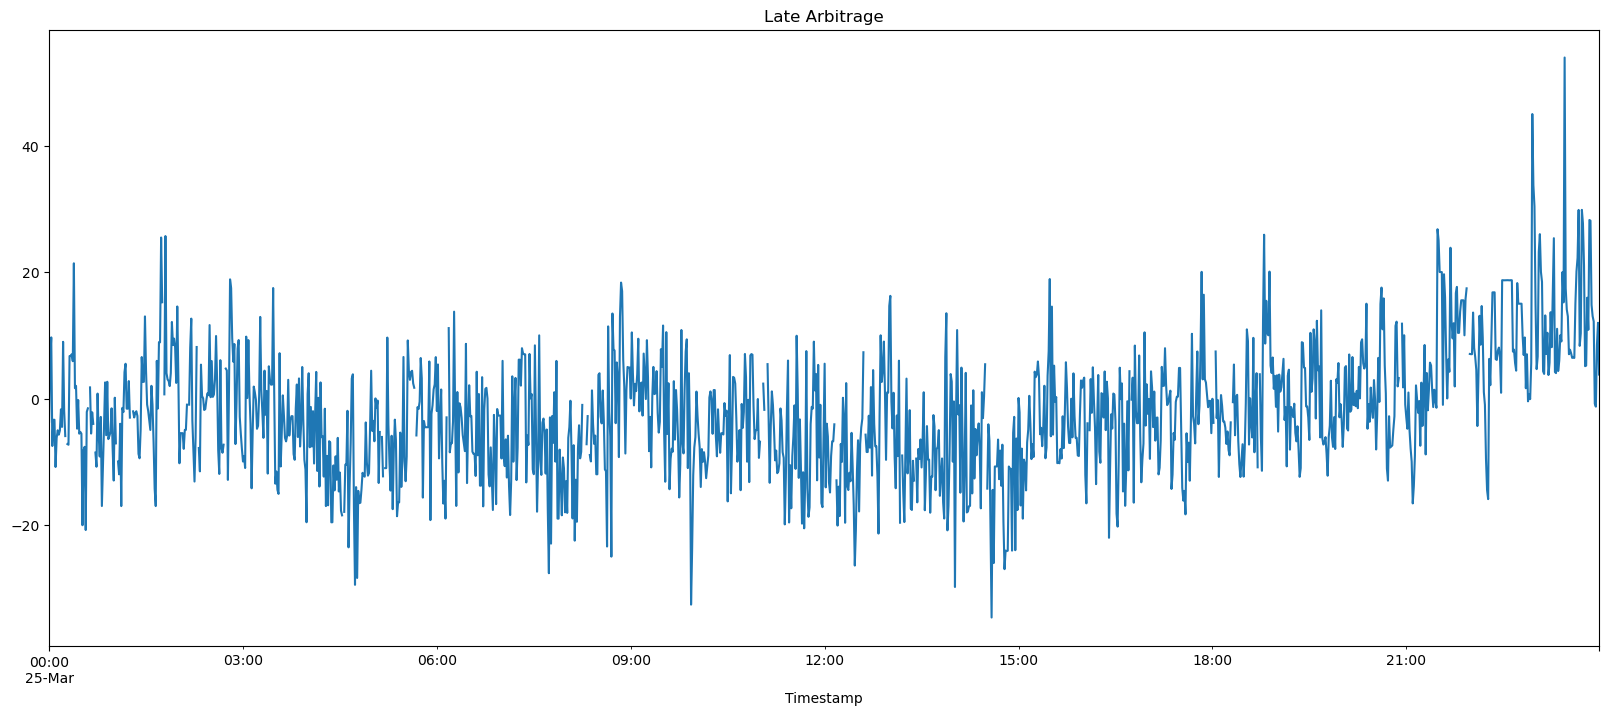

In [46]:
arb_sprd_late.plot(figsize=(20,8), title="Late Arbitrage")

In [47]:
# profit_per_trade_0102 = profitable_trading_0102 * bitstamp['Close'].loc['2018-01-02']

In [48]:
# Generate the summary statistics for the early profit per trade DataFrame
# YOUR CODE HERE

In [49]:
# Plot the results for the early profit per trade DataFrame
# YOUR CODE HERE

#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [50]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
# YOUR CODE HERE

#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [51]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_0102 = # YOUR CODE HERE

SyntaxError: invalid syntax (4217721114.py, line 2)

In [ ]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
# YOUR CODE HERE

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** YOUR ANSWER HERE

# EXTRA VISUALS - Exhibit A and B
```
adding a couple more overlays... 
```


In [ ]:

# close up on February visually confirms that trading range was tightly matched.

bitstamp['Close'].loc['2018-02-01' : '2018-02-28'].plot(
    legend=True,
    figsize=(18,6),
    ylabel="Price (USD$)",
    title="BTC Arbitrage - Exhibit A: BTSP and COIN - Feb. 2018",
    color="#006400",
    label="Bitstamp")
coinbase['Close'].loc['2018-02-01' : '2018-02-28'].plot(
    legend=True,
    figsize=(18,6),
    ylabel="Price (USD$)",
    color="orange",
    label="Coinbase")

# Ideal trading window for Q1 2018: 

In [ ]:
bitstamp['Close'].loc['2018-01-27' : '2018-01-29'].plot(
    legend=True,
    figsize=(18,6),
    ylabel="Price (USD$)",
    title="Exhibit B: Top 3 days of BTC Arbitrage Opportunites - Q1 2018: BTSP and COIN",
    color="#00ff33",
    label="BTSP",
    )
coinbase['Close'].loc['2018-01-27' : '2018-01-29'].plot(
    legend=True,
    figsize=(18,6),
    ylabel="Price (USD$)",
    color="#bd0f0f",
    label="COIN"
    )

# January 27-29 in 2018 - The Best for ideal arbitrage window of quarter.  
## Visual analysis of the dataframes reveals likely ~ 95:1 odds of success
###  license to print money on 1/28: *BTC* traders... buy on COIN exchange and simultaneously sell on the BTSP exchange!